<a href="https://colab.research.google.com/github/biagoncalves/Projeto-Album-de-Figurinhas/blob/main/Projeto_Album_de_Figurinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO: Álbum One Piece 2021**



Quantos de nós já não tiveram a incrível experiência de comprar e ~~tentar~~ completar álbuns de figurinhas? A empolgante sensação de abrir cada pacote de figurinhas, esperando encontrar os cromos faltantes fez parte da infância de muitos. Mas quanto será que tudo isso custa? Bom, podemos responder a essas e outras perguntas com o auxílio do Python e algumas suposições básicas.

Este projeto foi inicialmente desenvolvido pelo Prof. Dr. Ricardo Rocha da FLAI – Inteligência Artificial e Data Science.

Vamos começar então? :)

## **CARACTERÍSTICAS**

O álbum tomado como exemplo para esta análise tem as seguintes características:

* Total de cromos: **212**
* Preço do livro ilustrado capa brochura: **R\$ 10,00**
* Envelope com 4 cromos: **R\$ 4,00**


## **SUPOSIÇÕES**

Para iniciar os estudos, é ncessário assumir algumas suposições que nos ajudarão a desenvolver um método de análise eficiente. São as seguintes:

1. Todas as figurinhas têm igual probabilidade de serem sorteadas;
2. Um pacotinho é comprado por vez até que se complete o álbum.



## **ALGORITMO**

Antes de escrever qualquer linha de código, é importante ter em mente o que será feito. Para isso, estabelecemos um algoritmo, que é, basicamente, uma sequência de passos que tomamos para chegar a um objetivo específico, uma solução para o problema. Podemos definir como nosso algoritmo a seguinte metodologia:

1. Comprar um pacotinho de figurinhas (4 figurinhas cada, que podem ser repetidas);
2. Colar no álbum e verificar se o álbum está completo;
3. Caso esteja incompleto, comprar mais um pacotinho. Caso contrário, terminar.



##**PERGUNTAS**

O objetivo deste projeto será, então, responder às seguintes perguntas:

1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Qual a probabilidade de se gastar menos que R$ 1.500,00 para completar o álbum?
5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?
8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?



In [ ]:
# suposições

n_album = 7 #212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10

In [ ]:
import numpy as np


In [ ]:
#como vamos representar um álbum? com a função do numpy np.zeros que cria um vetor com uma quantidade n de zeros

album = np.zeros(n_album) #album cru, sem figurinhas
album

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#comprar um pacote

#np.arange(0, n_album)

pacotinho = np.random.choice(np.arange(0, n_album) , size = 4) #pode vir repetido
pacotinho #lembrando que são as posições - de 0 a 6

array([2, 3, 5, 5])

In [ ]:
#colar figurinha no álbum

# fazemos isso  album[pacotinho[0]] = album[pacotinho[0]] + 1  ou album[pacotinho[0]] += 1

album[pacotinho[0]] += 1 #vai adicionando, contando + 1 - lembrando que esse operador é pra somar 1 ao próprio objeto
album[pacotinho[1]] += 1
album[pacotinho[2]] += 1
album[pacotinho[3]] += 1

album

array([4., 2., 1., 8., 1., 4., 4.])

In [ ]:
#tenho todas as figurinhas?

album >= 1

np.all(album >= 1) #true quando está completo

not np.all(album >= 1) #falso quando está completo

False

In [ ]:
# colocando tudo isso em um programinha

album = np.zeros(n_album)
pacotes = 0

while True:
  pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
  pacotes += 1 

  for i in [0, 1, 2, 3]: #testar depois com for i in range(4) - vai de 0 a 3 como se fosse um np.arange
    album[pacotinho[i]] += 1
    
  if np.all(album >= 1):
    break  

album    
pacotes
print(album, pacotes)
print(pacotes*preco_pacote + preco_album)

[4. 4. 2. 1. 2. 1. 2.] 4
26


In [ ]:
#fazendo agora com a quantidade real de figurinhas - 212

n_album = 212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10

album = np.zeros(n_album)
pacotes = 0

while True:
  pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
  pacotes += 1 

  for i in [0, 1, 2, 3]:
    album[pacotinho[i]] += 1
    
  if np.all(album >= 1):
    break  

print(pacotes*preco_pacote + preco_album) #custo final

1554


In [ ]:
#pra sabermos o valor médio, só é preciso replicar o experimento algumas vezes. faremos uma função para essa simulação:

def SimulaAlbum(): #sem parâmetro porque é só pra executar esse código

    n_album = 212
    preco_pacote = 4
    cromos_por_pacote = 4
    preco_album = 10

    album = np.zeros(n_album)
    pacotes = 0

    while True:
      pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
      pacotes += 1 

      for i in [0, 1, 2, 3]:
        album[pacotinho[i]] += 1
        
      if np.all(album >= 1):
        break  

    custo = pacotes*preco_pacote + preco_album

    return custo

In [ ]:
SimulaAlbum()

990

### 1. Qual o valor médio investido para completar o álbum nessas condições?

In [ ]:
S = 1000 #quantidade de simulações que serão feitas

resultados = []

for i in range(S): #vai de 0 a 999
  pessoa = SimulaAlbum()
  resultados.append(pessoa)
  #if i % 100 == 0: - caso eu queira acompanhar os cálculos
   #print (i)

#resultados
print(np.array(resultados).mean()) #media do custo
sim = np.array(resultados)


1270.488


### 2. Quantos pacotes são necessários comprar, em média, para completar o álbum?

In [ ]:
#número de pacotinhos

(np.array(resultados).mean() - preco_album) / preco_pacote

315.122

### 3. Qual é a distribuição empírica do valor investido para completar o álbum?

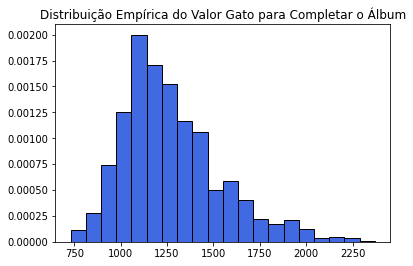

In [ ]:
#distribuição da probabilidade relacionada aos custos de se completar o álbum

import matplotlib.pyplot as plt

plt.hist(sim, bins = 20, density = True, color = 'royalblue', edgecolor = 'black') #density é pra colocar proporção ao invés da contagem
plt.title('Distribuição Empírica do Valor Gato para Completar o Álbum')
plt.show()

### 4. Qual a probabilidade de se gastar menos que R$ 1.500,00 para completar o álbum?

In [ ]:
#basta ver a frequencia com que ocorreu os valores abaixo de 1500

# np.array(sim) < 1500 compara dentro do vetor os valores menores que 1500. considerando que true é igual a 1 e false igual a 0, a soma dessa operação será a qtd de valores procurada

# (np.array(sim) < 1500).mean() é a proporção de trues - o mesmo que faremos abaixo

prob1 = sum(np.array(sim) < 1500) / S

print('A probabilidade de se gastar menos de 1500 é {:.2f}%'.format(prob1*100))

A probabilidade de se gastar menos de 1500 é 82.60%


### 5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?


In [ ]:
prob2 = sum(np.array(sim) > np.array(sim).mean()) / S

print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar mais do que a média é 41.60%


### 6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?


In [ ]:
#intervalo de confiança via quantil - imaginar no histograma: 2,5% do canto esquerdo, 2,5% do canto direito e os 95% do meio

qts = np.quantile(sim, [0.025, 0.975])
qts

#posso afirmar, com 95% de confiança, que o gasto a se ter para completar o álbum está entre R$ 874,00 e R$ 1.914,00. Mostra uma grande variabilidade

array([ 874., 1914.])

### 7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?

In [ ]:
#fazendo os ajustes necessários - basta entender que, agora, pra completar o album com dois amigos, por exemplo, é necessário ter duas figurinhas de cada posição

def SimulaAlbum(n_amigos): #agora com o paramentro do número de amigos

    n_album = 212
    preco_pacote = 4
    cromos_por_pacote = 4
    preco_album = 10

    album = np.zeros(n_album)
    pacotes = 0

    while True:
      pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
      pacotes += 1 

      for i in [0, 1, 2, 3]:
        album[pacotinho[i]] += 1
        
      if np.all(album >= n_amigos): # mudamos isso aqui
        break  

    custo = pacotes*preco_pacote + preco_album

    return custo / n_amigos # mudamos isso aqui

In [ ]:
SimulaAlbum(2)

697.0

In [ ]:
S = 1000 
resultados = []

for i in range(S): 
  pessoa = SimulaAlbum(2) #simulando com 2 pessoas
  resultados.append(pessoa)

sim = np.array(resultados)
sim.mean()

873.104

In [ ]:
#desconto em relação ao outro gasto:

1 - sim.mean() / 1270 #proporção de gastos - 31% de redução de custo

0.3125165354330708

### 8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?

In [ ]:
S = 1000 
resultados = []

for i in range(S): 
  pessoa = SimulaAlbum(3) #simulando com 2 pessoas
  resultados.append(pessoa)

sim = np.array(resultados)
sim.mean()

711.9053333333334

In [ ]:
1 - sim.mean() / 1270 #proporção de gastos - 44% de redução de custo

0.4394446194225722

### Fazer depois a seção do gráfico com o custo por amigo e os exercícios